# SUP
Sorting the best of files. 

In [1]:
# imports
import numpy as np
import pandas as pd
import importlib
import matplotlib
from pipeline.code.file_reader import *
import pipeline.code.Estimator as es
from pipeline.est_pipeline import *

In [2]:
# accessing conf file:
conf_f = 'test_inputs/CONF_data.txt'
conf_d = read_file_dic(conf_f)

## Part 1: Pulling in ratings

In [3]:
# Pull the csv file containing rankings
fpath = "/home/emcewen/data/aocb_rating_20201111.csv"
all_files = pd.read_csv(fpath)


In [4]:
#create a column for the aocb file name to match with corr files

all_files["dataname"] = all_files["date"].map(str) + "_" + all_files["name"]

#print(all_files["dataname"])

## Part 2: Merging with wind data table

In [5]:
# pulling in wind data table

corr_path = "/home/emcewen/code_dev/csv/main_cfht_250.csv"
corr_files = pd.read_csv(corr_path)

#print(corr_files)

In [6]:
#filter out based on operations
# want only the ssub=True, ttsub = true

corr_filt = corr_files.loc[(corr_files['ssub'] == True) & (corr_files['ttsub'] == True)]
corr_compress = corr_filt.groupby('dataname', as_index=False).first()

#print(corr_compress)

In [7]:
# merge match with big data table
# data rating: all_files
# conf listing: corr_compress

merge = pd.merge(all_files, corr_compress, how="inner", on=["dataname"])

#print(merge)

In [8]:
# saving this merged file

merge.to_csv("/home/emcewen/code_dev/csv/corr_classified.csv")

## Part 3: Estimator, single computation

In [2]:
# reloads the estimator for code changes
importlib.reload(es)
# reloads merge:
merge = pd.read_csv("/home/emcewen/code_dev/csv/corr_classified.csv", index_col=0)

In [3]:
# Filter based on ratings
# class : s, u, p 
# score_mark : 1, 0.5, 0

input_f = merge.loc[(merge['class'] == "s") & (merge['score_mark'] == 1)]

date = 20180526
in_d = input_f[input_f['OBSDATE'] == date]

#print(input_f)

In [7]:
# run through estimator
est = es.Estimator(in_d.iloc[1])
est.estimate(False, 200, sig=3, thresh=2)


/home/emcewen/out/20180526/fits/20180526_aocb0035o_tmax200_stt.fits
AUTOCORR


,dataname,DATETIME,cfht_wspd,cfht_wdir,250_wspd,250_wdir,p_spd,p_spd_sdev,p_dir,p_dir_sdev,sub_len,sig,thresh,c_min
0,20180526_aocb0035o,2018-05-26 11:34:54,9.774449,46.0,21.735289,268.0,16.316820,1.931576,291.766882,5.496064,200,3,2,4
1,20180526_aocb0035o,2018-05-26 11:34:54,9.774449,46.0,21.735289,268.0,4.538187,0.995558,80.339981,13.402732,200,3,2,4


In [9]:
#average estimates over the night?
# print(in_d)

## Part 4: Estimator, df iterator

In [10]:
# using all the same parameters:

df_out = df_iterator(in_d, c_size=1)

/home/emcewen/out/20180526/fits/20180526_aocb0019o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0035o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0047o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0055o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0124o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0125o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0126o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0128o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0130o_tmax200_stt.fits
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0131o_tmax200_stt.fits
AUTOCORR


In [15]:
#print(df_out)

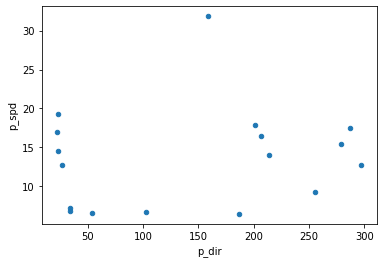

In [28]:
df_out.plot.scatter(x = 'p_dir', y = 'p_spd')

## Part 5: Estimator, df iterator mult
This code asks you to give in iterations of parameters

In [8]:
# setting up parameter lists
#subtraction length (must be a int, not a float)
sl_list = np.arange(0, 200, 10)
#sigma for sigma clipping
sig_list = np.linspace(1., 5., 10)
# thresholds for maximum peaks
thresh_list = np.linspace(1., 5., 10)
# cluster size
c_list = np.arange(2, 5)

In [9]:
print(c_list)

[2 3 4]


In [10]:
df_out = df_iterator_mult(in_d, sl_list, sig_list, thresh_list, c_list)

/home/emcewen/out/20180526/fits/20180526_aocb0019o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0035o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0047o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0055o_tmax200_stt.fits
AUTOCORR
AUTOCORR


/home/emcewen/.local/lib/python3.6/site-packages/hdbscan/hdbscan_.py:1052: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)
/home/emcewen/code_dev/pipeline/code/Estimator.py:156: RuntimeWarning: invalid value encountered in less_equal
  non_outliers = np.where(clusterer.outlier_scores_ <= threshold)[0]
/home/emcewen/.local/lib/python3.6/site-packages/hdbscan/hdbscan_.py:1052: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)
/home/emcewen/code_dev/pipeline/code/Estimator.py:156: RuntimeWarning: invalid value encountered in less_equal
  non_outliers = np.where(clusterer.outlier_scores_ <= threshold)[0]
/home/emcewen/.local/lib/python3.6/site-packages/hdbscan/hdbscan_.py:1052: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)
/home/emcewen/code_dev/pipeline/code/Estimator.py

AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0124o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0125o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0126o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0128o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0130o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


/home/emcewen/out/20180526/fits/20180526_aocb0131o_tmax200_stt.fits
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR
AUTOCORR


In [11]:
df_out.to_csv("/home/emcewen/code_dev/csv/20180526_iter_est.csv")

## Estimate iteration exploration

In [66]:
df_iter = pd.read_csv("/home/emcewen/code_dev/csv/20180526_iter_est.csv", index_col=0)
print(df_iter.shape)

(33359, 14)


In [65]:
in_d.std()['250_wdir']

0.9660917830792958

In [24]:
in_d.mean()['cft_wdir']

43.6

In [ ]:
in_d.plot(kind='scatter', x = 'cft_wdir', y = 'cft_wspd', c='red')
in_d.plot(kind='scatter', x = '250_wdir', y = '250_wspd', c='blue')


### Plotting Wind statistics
Plotting just the data from the night put through the iterator

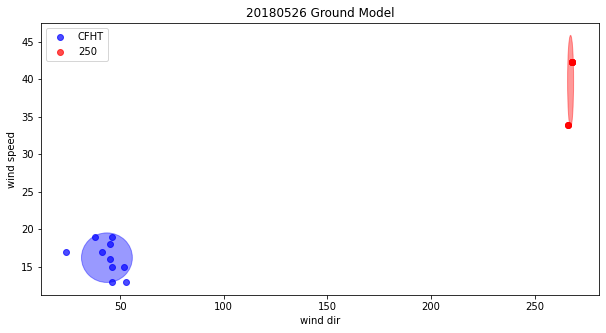

In [4]:
# 250 mb Plot

#cond = df.col3 > 300
#subset_a = df[cond].dropna()
#subset_b = df[~cond].dropna()

plt.figure(figsize=(10,5))
ax = plt.gca()

plt.scatter(in_d['cft_wdir'], in_d['cft_wspd'], c='b', label='CFHT', alpha = 0.7)
el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), 3*in_d['cft_wdir'].std(), 3*in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
ax.add_patch(el_cfht)

plt.scatter(in_d['250_wdir'], in_d['250_wspd'], c='r', label='250', alpha = 0.7) 
el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), 3*in_d['250_wdir'].std(), 3*in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
ax.add_patch(el_250mb)

plt.title('20180526 Ground Model')
plt.ylabel('wind speed')
plt.xlabel('wind dir')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

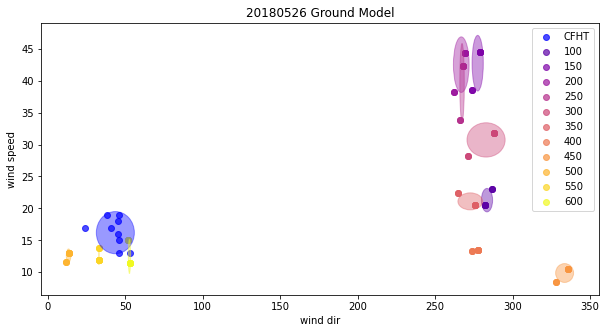

In [15]:
# all mb plot

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.scatter(in_d['cft_wdir'], in_d['cft_wspd'], c='b', label='CFHT', alpha = 0.7)
el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), 3*in_d['cft_wdir'].std(), 3*in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
ax.add_patch(el_cfht)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
j=0

#my_cmap = mcolors.ListedColormap(colors)
cmap = mpl.cm.plasma

for i in range(100,601,50):
    wdir = str(i)+"_wdir"
    wspd = str(i)+"_wspd"
    plt.scatter(in_d[wdir], in_d[wspd], c=cmap(i/600), label=str(i), alpha = 0.7) 
    ellipse = matplotlib.patches.Ellipse((in_d[wdir].mean(), in_d[wspd].mean()), 3*in_d[wdir].std(), 3*in_d[wspd].std(), angle=0, color=cmap(i/600), alpha=0.4)
    ax.add_patch(ellipse)
    j = j + 1
    
plt.title('20180526 Ground Model')
plt.ylabel('wind speed')
plt.xlabel('wind dir')
plt.legend()

### Plotting Estimations, varying parameters
Plotting just the estimates from the night put through the iterator

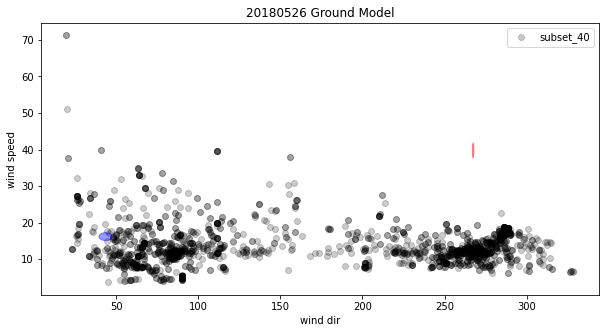

In [88]:

# sort by post subtraction
sub_len = 40
subset = df_iter[df_iter['sub_len'] == sub_len]


plt.figure(figsize=(10,5))
ax = plt.gca()
plt.scatter(subset['p_dir'], subset['p_spd'], c='black', label='subset_'+str(sub_len), alpha = 0.2)

el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), in_d['cft_wdir'].std(), in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
ax.add_patch(el_cfht)
el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), in_d['250_wdir'].std(), in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
ax.add_patch(el_250mb)
plt.title('20180526 estimates')
plt.ylabel('wind speed')
plt.xlabel('wind dir')
plt.legend()

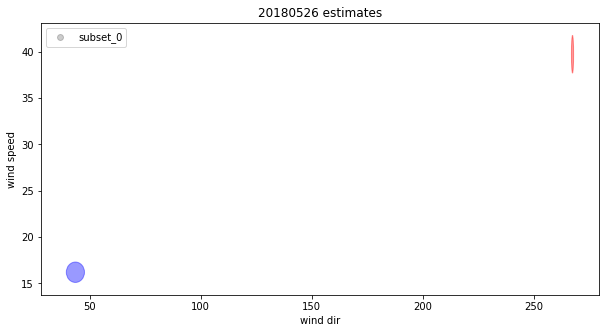

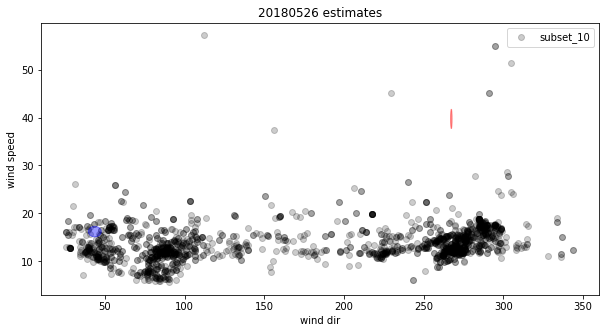

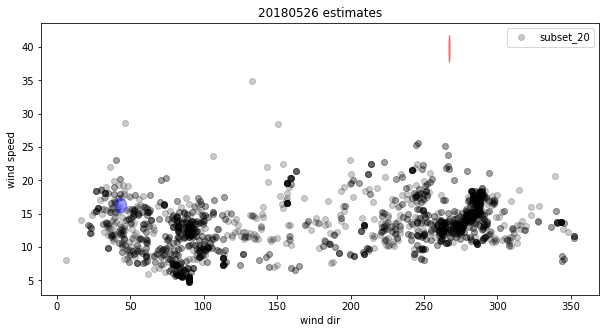

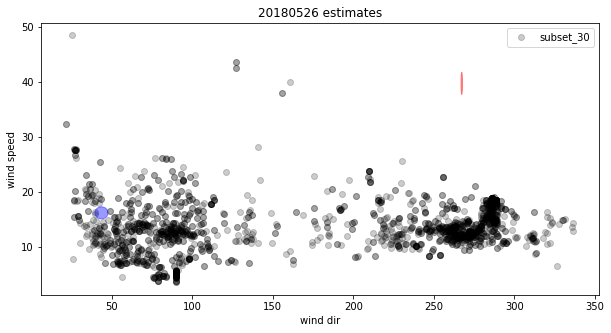

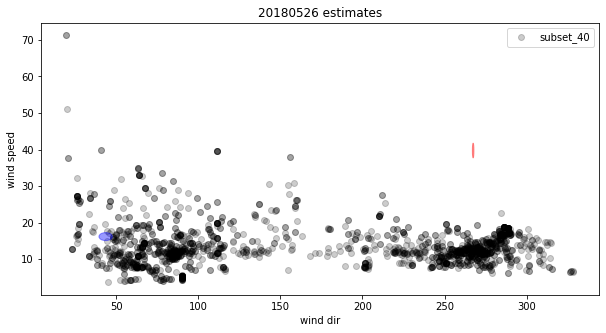

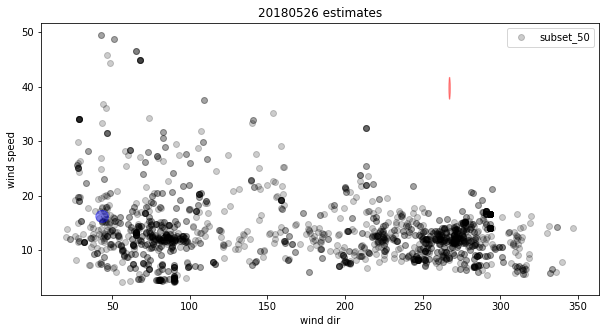

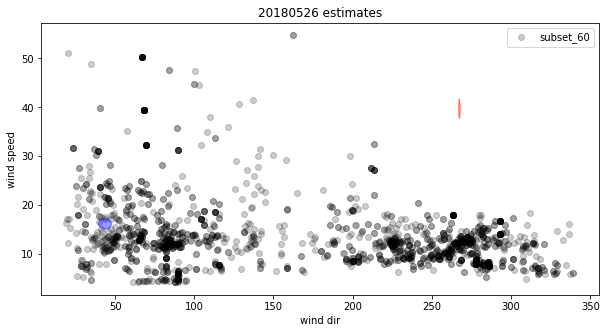

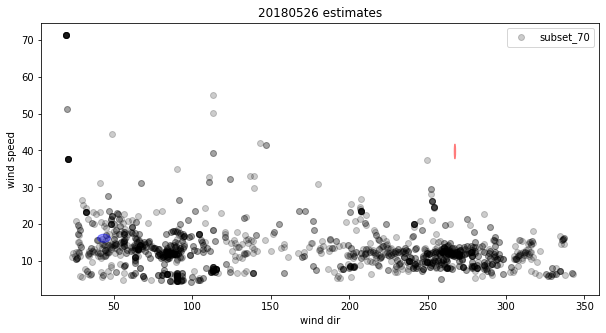

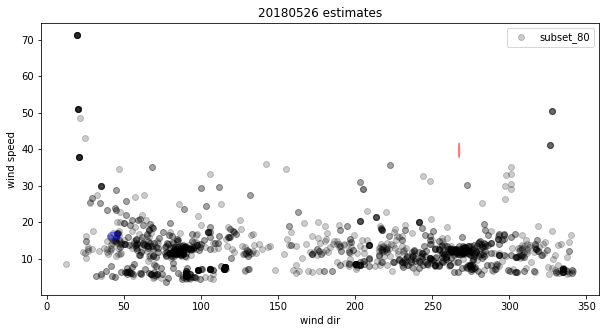

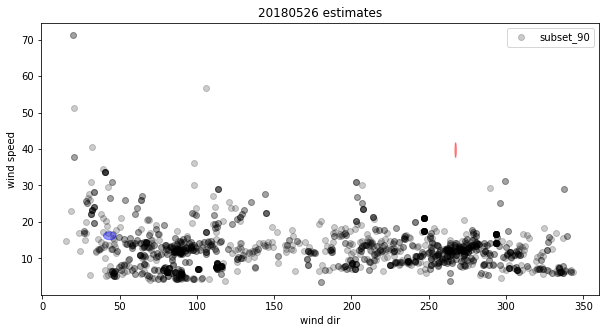

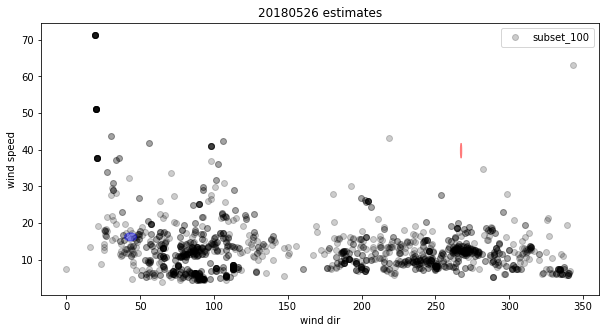

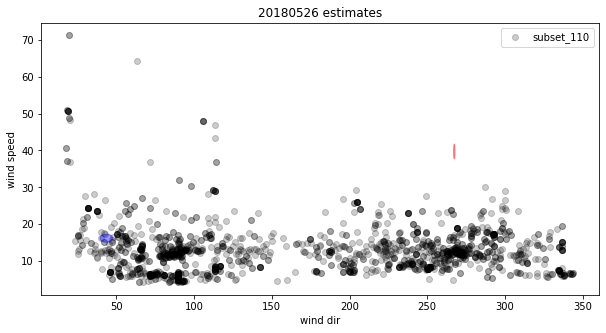

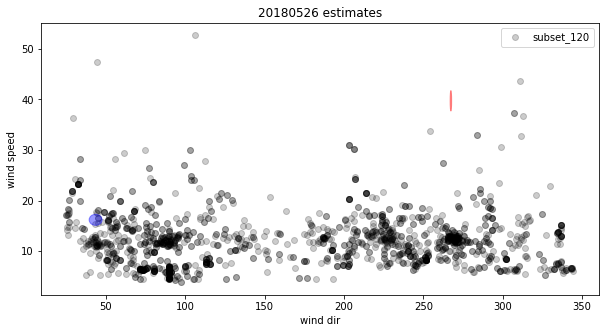

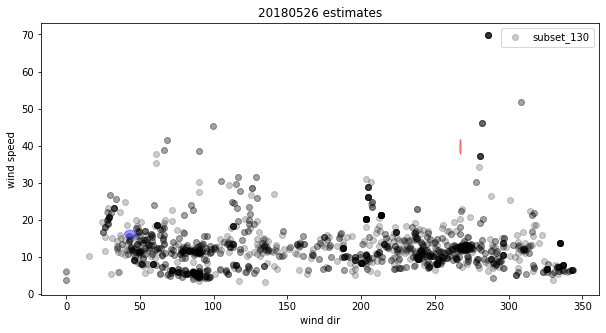

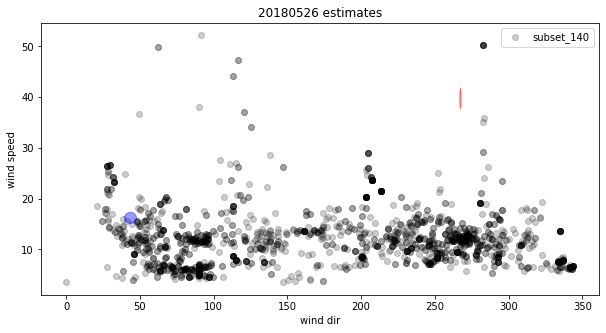

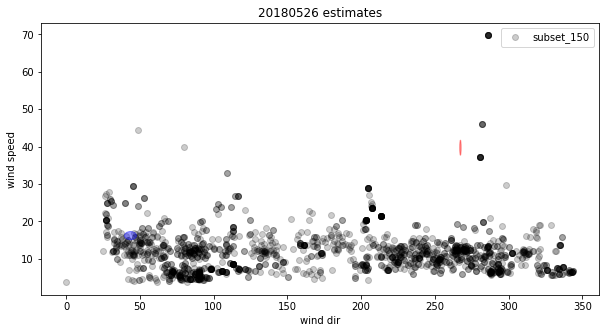

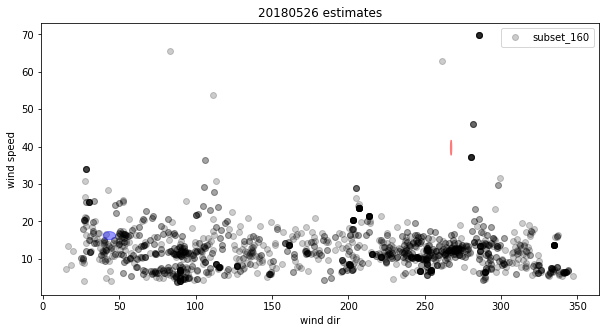

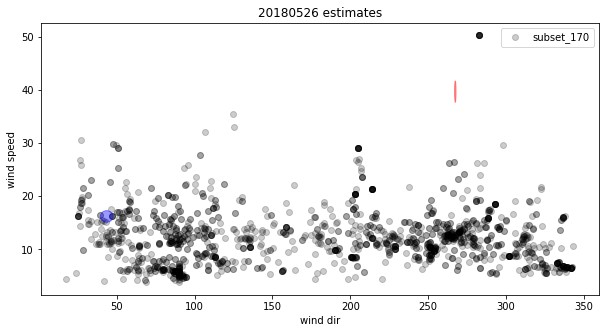

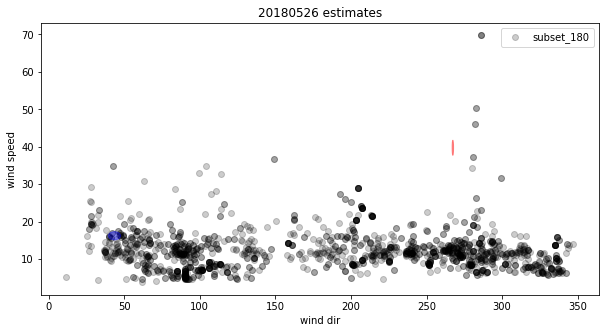

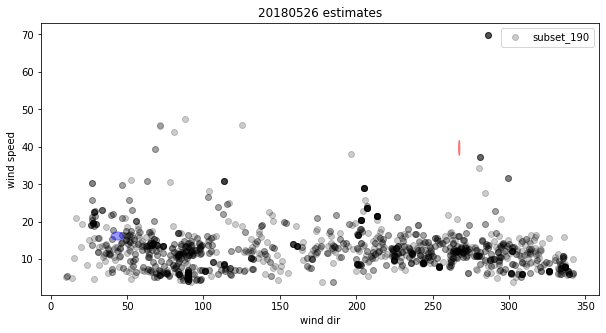

In [90]:
for x in np.arange(0, 200, 10):
    sub_len = x
    subset = df_iter[df_iter['sub_len'] == sub_len]

    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.scatter(subset['p_dir'], subset['p_spd'], c='black', label='subset_'+str(sub_len), alpha = 0.2)

    el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), in_d['cft_wdir'].std(), in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
    ax.add_patch(el_cfht)
    el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), in_d['250_wdir'].std(), in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
    ax.add_patch(el_250mb)
    plt.title('20180526 estimates')
    plt.ylabel('wind speed')
    plt.xlabel('wind dir')
    plt.legend()

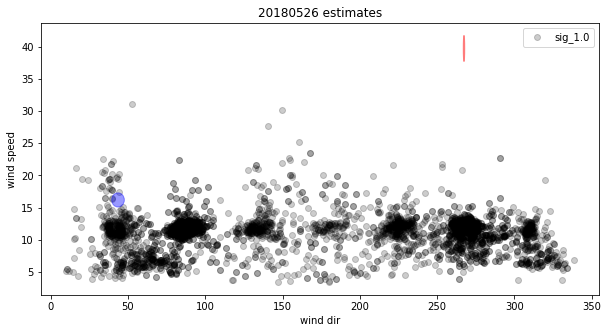

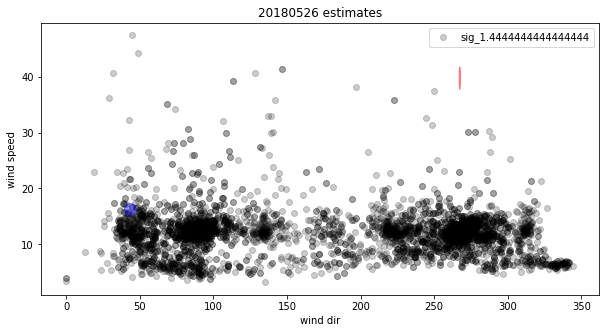

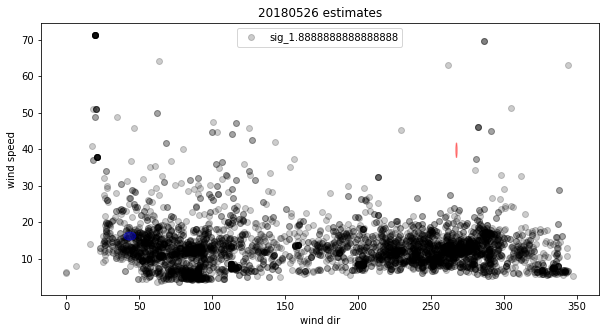

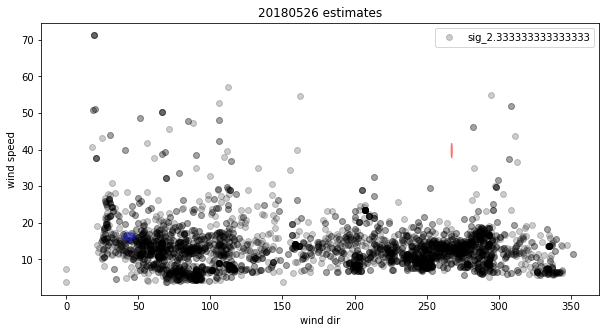

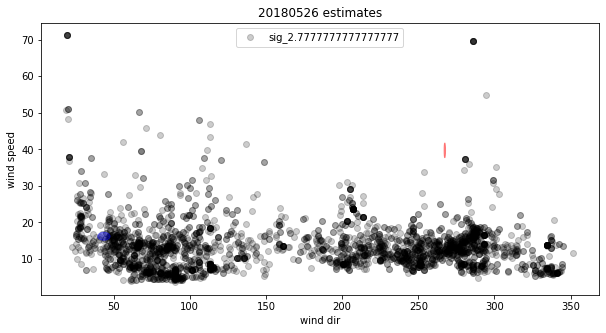

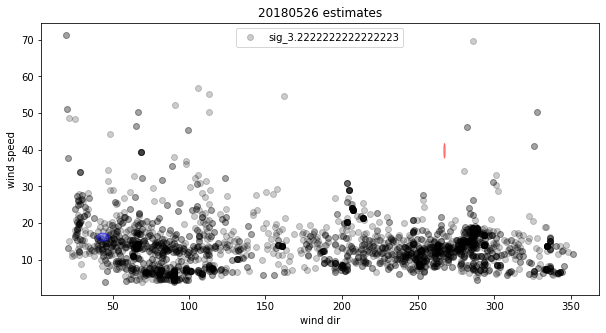

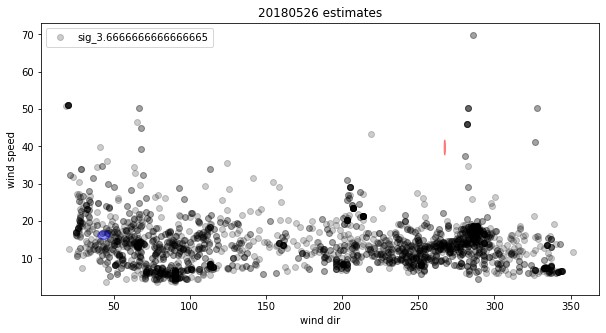

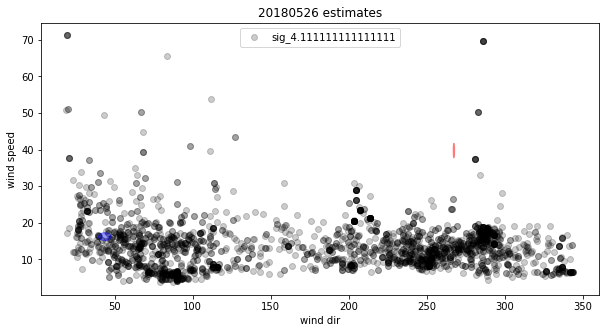

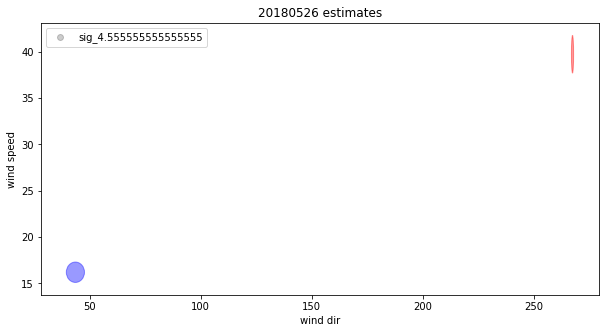

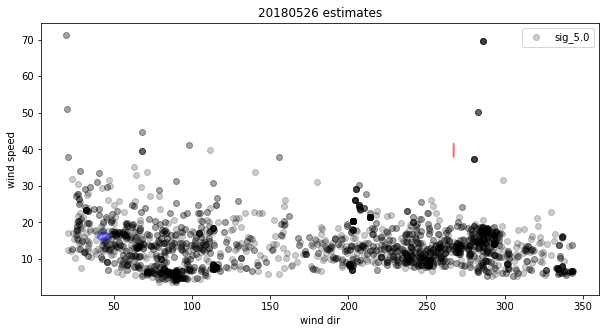

In [92]:
### Setting sigma clipping ###

for x in np.linspace(1., 5., 10):
    sig = x
    subset = df_iter[df_iter['sig'] == sig]

    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.scatter(subset['p_dir'], subset['p_spd'], c='black', label='sig_'+str(sig), alpha = 0.2)

    el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), in_d['cft_wdir'].std(), in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
    ax.add_patch(el_cfht)
    el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), in_d['250_wdir'].std(), in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
    ax.add_patch(el_250mb)
    plt.title('20180526 estimates')
    plt.ylabel('wind speed')
    plt.xlabel('wind dir')
    plt.legend()

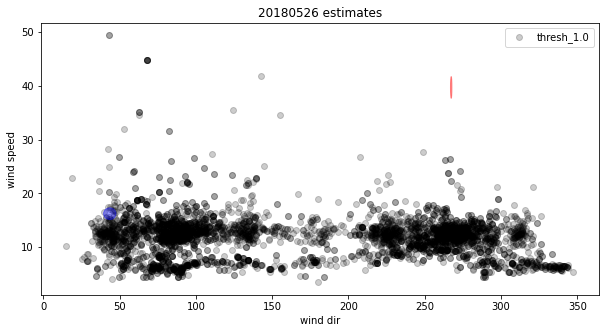

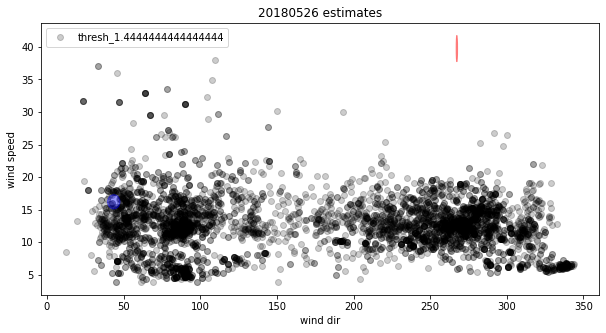

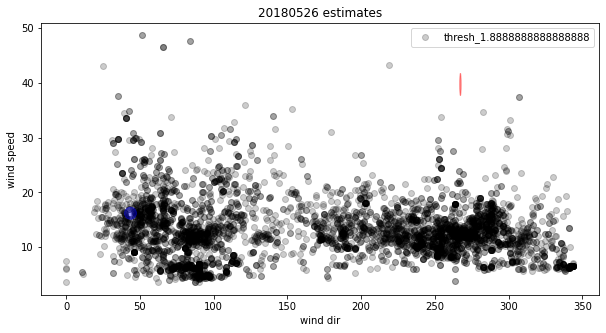

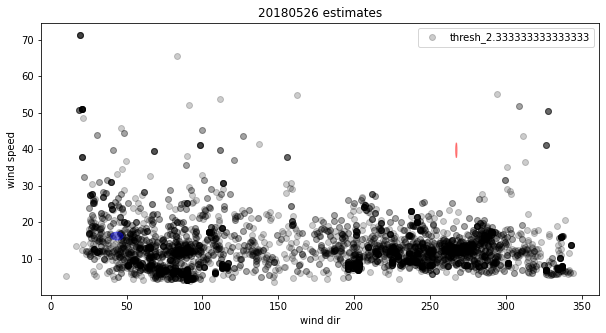

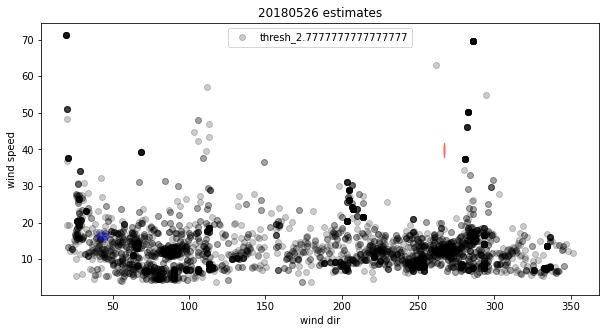

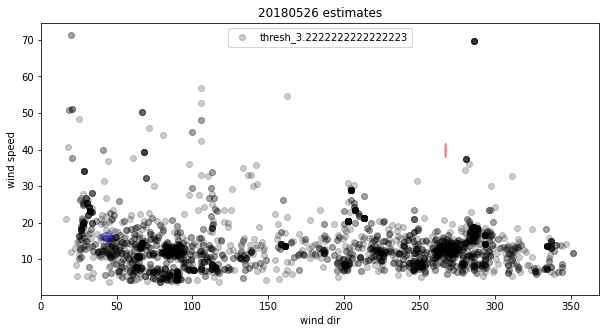

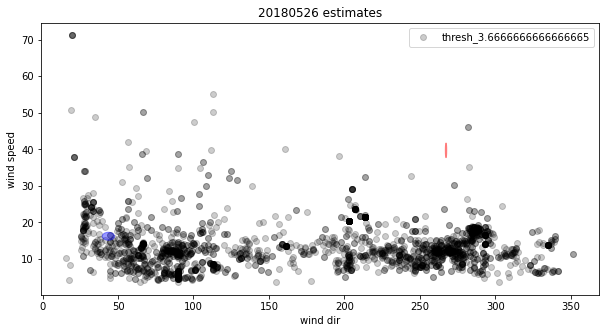

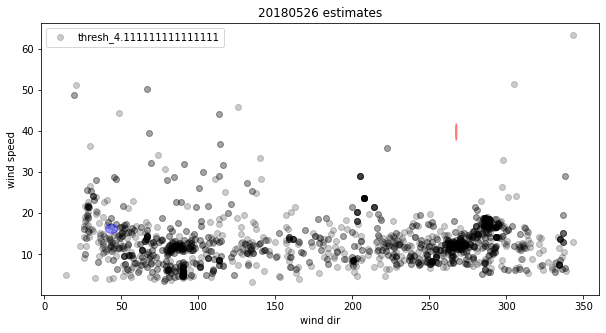

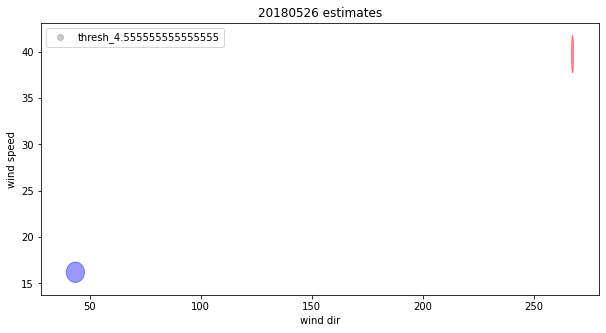

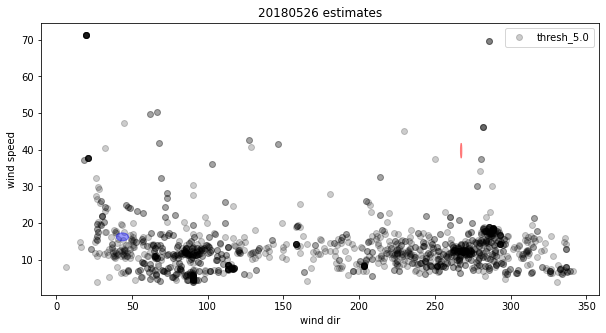

In [94]:
for x in np.linspace(1., 5., 10):
    thresh = x
    subset = df_iter[df_iter['thresh'] == thresh]

    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.scatter(subset['p_dir'], subset['p_spd'], c='black', label='thresh_'+str(thresh), alpha = 0.2)

    el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), in_d['cft_wdir'].std(), in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
    ax.add_patch(el_cfht)
    el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), in_d['250_wdir'].std(), in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
    ax.add_patch(el_250mb)
    plt.title('20180526 estimates')
    plt.ylabel('wind speed')
    plt.xlabel('wind dir')
    plt.legend()

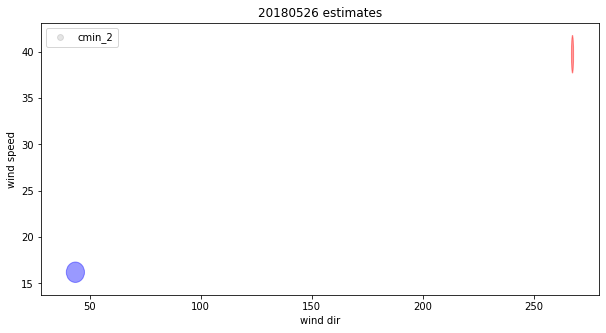

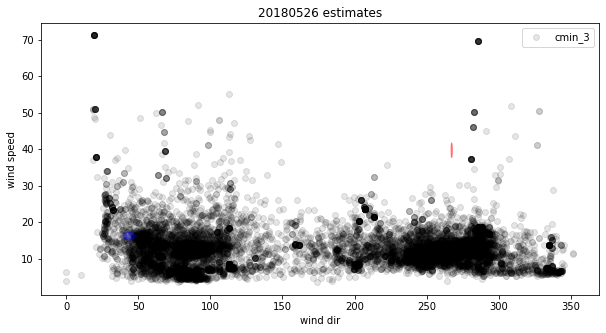

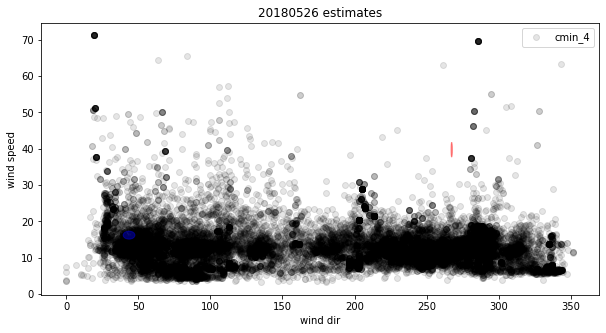

In [96]:
for x in np.arange(2, 5):
    cmin = x
    subset = df_iter[df_iter['c_min'] == cmin]

    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.scatter(subset['p_dir'], subset['p_spd'], c='black', label='cmin_'+str(cmin), alpha = 0.1)

    el_cfht = matplotlib.patches.Ellipse((in_d['cft_wdir'].mean(), in_d['cft_wspd'].mean()), in_d['cft_wdir'].std(), in_d['cft_wspd'].std(), angle=0, color='b', alpha=0.4)
    ax.add_patch(el_cfht)
    el_250mb = matplotlib.patches.Ellipse((in_d['250_wdir'].mean(), in_d['250_wspd'].mean()), in_d['250_wdir'].std(), in_d['250_wspd'].std(), angle=0, color='r', alpha=0.4)
    ax.add_patch(el_250mb)
    plt.title('20180526 estimates')
    plt.ylabel('wind speed')
    plt.xlabel('wind dir')
    plt.legend()